In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


### 1、Import tensorflow and use tensorflow to define a constant.

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

hello = tf.constant('Welcome to Huawei')  #Define a constant.

### 2、Use tensorflow to print 'Welcome to Huawei'.

In [ ]:
import tensorflow.compat.v1 as tf
# #tf.disable_v2_behavior()
# tf.compat.v1.disable_eager_execution()


sess = tf.Session()
print (sess.run(hello))
sess.close()

b'Welcome to Huawei'


### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [ ]:
a = tf.constant(5)
b = tf.constant(2)

c = a + b
d = a - b

sess = tf.Session()
print ('subtraction:',sess.run(d),'\nsum:',sess.run(c))
# sess.close()

subtraction: 3 
sum: 7


### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [ ]:
random_int_var1 = tf.get_variable("randint_var1", initializer=tf.random_uniform([3, 3],minval=1,maxval=10,dtype=tf.int32))
random_int_var2 = tf.get_variable("randint_var2", initializer=tf.random_uniform([3, 3],minval=1,maxval=10,dtype=tf.int32))

print(random_int_var1)
print(random_int_var2)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('\n1st matrix:\n',sess.run(random_int_var1))
print()
print('2nd matrix:\n',sess.run(random_int_var2))

tf_matrix_multiplication_prod = tf.matmul(random_int_var1, random_int_var2)
print('\nResult of multiplication:\n',sess.run(tf_matrix_multiplication_prod))

sess.close()

<tf.Variable 'randint_var1:0' shape=(3, 3) dtype=int32_ref>
<tf.Variable 'randint_var2:0' shape=(3, 3) dtype=int32_ref>

1st matrix:
 [[9 3 9]
 [2 5 4]
 [1 7 2]]

2nd matrix:
 [[8 9 5]
 [2 7 9]
 [2 4 5]]

Result of multiplication:
 [[ 96 138 117]
 [ 34  69  75]
 [ 26  66  78]]


### 5、Try to use your own handwriting number to do image recognition

In [ ]:
# importing libraries 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
#import tensorflow_datasets as tfds
from tensorflow.examples.tutorials.mnist import input_data
learn = tf.contrib.learn 
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = input_data.read_data_sets("data\\MNIST_data\\")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data\MNIST_data\/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data\MNIST_data\/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data\MNIST_data\/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data\MNIST_data\/t10k-labels-idx1-ubyte.gz


In [ ]:
data = mnist.train.images 
labels = np.asarray(mnist.train.labels, dtype = np.int32) 
test_data = mnist.test.images 
test_labels = np.asarray(mnist.test.labels, dtype = np.int32) 
  
max_examples = 10000
data = data[:max_examples] 
labels = labels[:max_examples]

In [ ]:
def display(i): 
    img = test_data[i] 
    plt.title('label : {}'.format(test_labels[i])) 
    plt.imshow(img.reshape((28, 28))) 

# img in tf is 28 by 28 px 
# fitting linear classifier 
feature_columns = learn.infer_real_valued_columns_from_input(data) 
classifier = learn.LinearClassifier(n_classes = 10,  
                                    feature_columns = feature_columns)
classifier.fit(data, labels, batch_size = 100, steps = 1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f0da6f6af90>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

0.9137
prediction : [7], label : 7


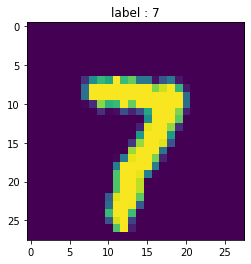

In [ ]:
# Evaluate accuracy 
classifier.evaluate(test_data, test_labels) 
print(classifier.evaluate(test_data, test_labels)["accuracy"]) 
  
prediction = classifier.predict(np.array([test_data[86]],  
                                         dtype=float),  
                                         as_iterable=False) 
print("prediction : {}, label : {}".format(prediction,  
      test_labels[86]) ) 
  
if prediction == test_labels[86]: 
     display(86)